<a href="https://colab.research.google.com/github/Sahana214/AI-DRIVEN-WEB-APPLICATION-FOR-AUTOMATED-DISEASE-DETECTION-IN-RICE-CROPS/blob/main/AI_DRIVEN_WEB_APPLICATION_FOR_AUTOMATED_DISEASE_DETECTION_IN_RICE_CROPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import os

os.makedirs("/content/drive/MyDrive/kaggle_data", exist_ok=True)


In [ ]:
!mv /content/kaggle.json /content/drive/MyDrive/kaggle_data/


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle_data/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!mv /content/rice-disease-dataset.zip /content/drive/MyDrive/kaggle_data/


In [ ]:
!unzip /content/drive/MyDrive/kaggle_data/rice-disease-dataset.zip -d /content/drive/MyDrive/rice-disease-dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-202-_jpg.rf.1b989a73dce576b0b326486f84320bab.jpg  
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-203-_jpg.rf.946676d6b7cf62a68551587fc1db15d1.jpg  
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-204-_jpg.rf.e0f94c70fc6b33228727ffaf85f20e78.jpg  
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-205-_jpg.rf.264c503555f6c853688861b15710a321.jpg  
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-205-_jpg.rf.fdbc3df56e1e30941709deeca31ab963.jpg  
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-206-_jpg.rf.9f25d37224f89a70422c19374633055b.jpg  
  inflating: /content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-207-_jpg.rf.348b115feec7d07233488177d6d4e419.jpg  
  inflating: /content/dri

In [ ]:
!ls /content/drive/MyDrive/rice-disease-dataset



test  train  valid


In [6]:
import os

def analyze_dataset(split_path, split_name):
    total_images = 0
    class_counts = {}

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)

        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]

            count = len(images)
            class_counts[class_name] = count
            total_images += count

    print(f"\n--- Analyzing {split_name} ---")
    print(f"Total images in {split_name}: {total_images}")
    print(f"Number of classes in {split_name}: {len(class_counts)}")
    print(f"Classes found in {split_name}: {', '.join(class_counts.keys())}")
    print(f"Image counts per class in {split_name}:")

    for cls, cnt in class_counts.items():
        print(f"  - {cls}: {cnt} images")


# 🔁 Change these paths to your dataset paths
train_path = "/content/drive/MyDrive/rice-disease-dataset/train"
test_path = "/content/drive/MyDrive/rice-disease-dataset/test"
val_path = "/content/drive/MyDrive/rice-disease-dataset/valid"

analyze_dataset(train_path, "Train")
analyze_dataset(test_path, "Test")
analyze_dataset(val_path, "Validation")



--- Analyzing Train ---
Total images in Train: 44237
Number of classes in Train: 10
Classes found in Train: rice_blast, rice_blight, rice_brown_spot, rice_dead_heart, rice_downy, rice_false, rice_norm, rice_shea, rice_streak, rice_tungro
Image counts per class in Train:
  - rice_blast: 4115 images
  - rice_blight: 4169 images
  - rice_brown_spot: 4180 images
  - rice_dead_heart: 4292 images
  - rice_downy: 2170 images
  - rice_false: 8016 images
  - rice_norm: 1729 images
  - rice_shea: 3901 images
  - rice_streak: 4913 images
  - rice_tungro: 6752 images

--- Analyzing Test ---
Total images in Test: 4747
Number of classes in Test: 9
Classes found in Test: rice_blast, rice_blight, rice_brown_spot, rice_dead_heart, rice_drowny, rice_false, rice_shea, rice_streak, rice_tungro
Image counts per class in Test:
  - rice_blast: 758 images
  - rice_blight: 585 images
  - rice_brown_spot: 617 images
  - rice_dead_heart: 688 images
  - rice_drowny: 402 images
  - rice_false: 427 images
  - rice

In [7]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/rice-disease-dataset/train"   # change to your dataset path

heights = []
widths = []
image_paths = []

# Walk through all class folders
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
            img_path = os.path.join(root, file)
            image_paths.append(img_path)

            img = cv2.imread(img_path)
            if img is not None:
                h, w, _ = img.shape
                heights.append(h)
                widths.append(w)

# ---- Statistics ----
print("📊 Image Size Statistics")
print(f"Total images: {len(heights)}")

print(f"Min height: {min(heights)}")
print(f"Max height: {max(heights)}")
print(f"Average height: {np.mean(heights):.2f}")

print(f"Min width: {min(widths)}")
print(f"Max width: {max(widths)}")
print(f"Average width: {np.mean(widths):.2f}")




📊 Image Size Statistics
Total images: 44237
Min height: 640
Max height: 640
Average height: 640.00
Min width: 640
Max width: 640
Average width: 640.00


Total images collected: 44237


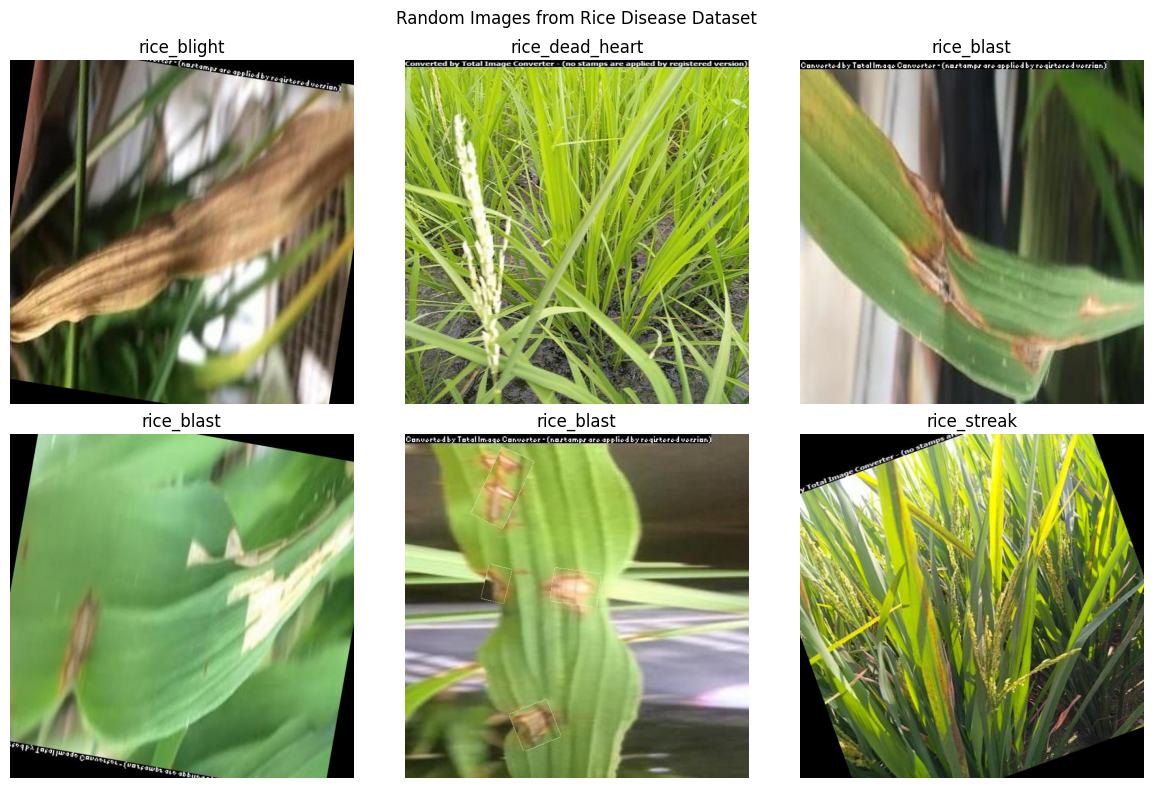

In [12]:
import os, random, cv2
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/rice-disease-dataset/train"

image_paths = []

# collect all images from class folders
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
                image_paths.append(os.path.join(class_path, file))

print("Total images collected:", len(image_paths))

num_images = 6
random_images = random.sample(image_paths, min(num_images, len(image_paths)))

plt.figure(figsize=(12,8))

for i, img_path in enumerate(random_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(os.path.basename(os.path.dirname(img_path)))  # class name
    plt.axis("off")

plt.suptitle("Random Images from Rice Disease Dataset")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_preprocess = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)
val_test_preprocess = ImageDataGenerator(
    rescale=1./255
)


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32


In [ ]:
print(train_data.class_indices)

{'rice_blast': 0, 'rice_blight': 1, 'rice_brown_spot': 2, 'rice_dead_heart': 3, 'rice_downy': 4, 'rice_false': 5, 'rice_norm': 6, 'rice_shea': 7, 'rice_streak': 8, 'rice_tungro': 9}


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import numpy as np
from google.colab import drive

# =========================
# SETTINGS
# =========================
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 3e-4
DROPOUT_RATE = 0.5  # slightly lower for better learning
MAX_TRAIN_IMAGES = 4000  # limit for fast training
MAX_VAL_IMAGES = 1000

# =========================
# MOUNT DRIVE
# =========================
drive.mount('/content/drive')

# =========================
# DATA GENERATORS WITH AUGMENTATION
# =========================
train_preprocess = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_preprocess = ImageDataGenerator(rescale=1./255)

# =========================
# TRAIN & VALIDATION DATA
# =========================
train_data = train_preprocess.flow_from_directory(
    "/content/drive/MyDrive/rice-disease-dataset/train",  # small folder with 4000 images
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_data = val_preprocess.flow_from_directory(
    "/content/drive/MyDrive/rice-disease-dataset/valid",  # 1000 images
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_data.num_classes
print(f"Number of classes: {num_classes}")

# =========================
# BUILD MODEL
# =========================
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # freeze base for initial training

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(DROPOUT_RATE)(x)
output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor="val_accuracy", patience=2, mode="max", verbose=1)

# =========================
# LIMIT STEPS FOR FAST TRAINING
# =========================
steps_per_epoch = min(MAX_TRAIN_IMAGES // BATCH_SIZE, len(train_data))
validation_steps = min(MAX_VAL_IMAGES // BATCH_SIZE, len(val_data))

# =========================
# TRAIN MODEL
# =========================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stop]
)

# =========================
# OPTIONAL: Fine-tune last layers for better accuracy
# =========================
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

# fine-tune for 2 more epochs
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=2,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stop]
)

# =========================
# EVALUATION
# =========================
y_true, y_pred = [], []
for i in range(validation_steps):
    images, labels = next(val_data)
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

acc = accuracy_score(y_true, y_pred)
print(f"Final Validation Accuracy: {acc*100:.2f}%")

# =========================
# SAVE MODEL
# =========================
model.save('/content/drive/MyDrive/trained_model_streamlit.h5')
print("Model saved successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 44237 images belonging to 10 classes.
Found 6000 images belonging to 10 classes.
Number of classes: 10
Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 2191s 9s/step - accuracy: 0.3157 - loss: 2.1443 - val_accuracy: 0.6583 - val_loss: 1.4431
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 1485s 6s/step - accuracy: 0.6148 - loss: 1.4239 - val_accuracy: 0.7933 - val_loss: 1.0964
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 1351s 5s/step - accuracy: 0.6793 - loss: 1.2580 - val_accuracy: 0.7752 - val_loss: 1.0756
Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 1253s 5s/step - accuracy: 0.5553 - loss: 1.5506 - val_accuracy: 0.7359 - val_loss: 1.1671
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 1142s 5s/step - accuracy: 0.6755 - loss: 1.3112 - val_accuracy: 0.7631 - val_loss: 1.0948


Final Validation Accuracy: 76.31%
Model saved successfully!


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/trained_model_streamlit.h5")
print("Model loaded")


Model loaded


In [ ]:
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,340,620 (8.93 MB)

 Trainable params: 1,288,714 (4.92 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/trained_model_streamlit.h5")


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_preprocess = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_preprocess = ImageDataGenerator(rescale=1./255)

# =========================
# TRAIN & VALIDATION DATA
# =========================
train_data = train_preprocess.flow_from_directory(
    "/content/drive/MyDrive/rice-disease-dataset/train",  # small folder with 4000 images
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_data = val_preprocess.flow_from_directory(
    "/content/drive/MyDrive/rice-disease-dataset/valid",  # 1000 images
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_data.num_classes
print(f"Number of classes: {num_classes}")


Found 44237 images belonging to 10 classes.
Found 6000 images belonging to 10 classes.
Number of classes: 10


In [ ]:
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1️⃣ Unfreeze last few layers for fine-tuning
# -----------------------------
# First, freeze all layers except last 20 (or adjust as needed)
for layer in model.layers[:-20]:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

# -----------------------------
# 2️⃣ Compile with low learning rate
# -----------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # small LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 3️⃣ Fine-tune model
# -----------------------------
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=2,                # you can increase to 3 if needed
    steps_per_epoch=250,     # fewer steps for faster run
    validation_steps=50      # smaller validation, fast feedback
)

# -----------------------------
# 4️⃣ Save the fine-tuned model
# -----------------------------
model.save("/content/drive/MyDrive/fine_tuned_model.keras")
print("Fine-tuned model saved!")


Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 3066s 12s/step - accuracy: 0.7337 - loss: 0.8076 - val_accuracy: 0.8813 - val_loss: 0.4199
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 2342s 9s/step - accuracy: 0.7924 - loss: 0.6086 - val_accuracy: 0.8587 - val_loss: 0.4892
Fine-tuned model saved!


In [ ]:
import pickle

# Save class names
class_names = train_data.class_indices  # dictionary of {class_name: index}
with open("/content/drive/MyDrive/class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)

print("Class names saved!")


Class names saved!


In [ ]:
from google.colab import files

# Download fine-tuned model
files.download("/content/drive/MyDrive/fine_tuned_model.keras")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Load your trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/fine_tuned_model.keras")

# Unfreeze last 20 layers for fine-tuning
for layer in model.layers[:-20]:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

# Compile with small learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train for ONLY 1 epoch
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=1,
    steps_per_epoch=train_data.samples // BATCH_SIZE,
    validation_steps=val_data.samples // BATCH_SIZE
)

# Save the model
model.save("/content/drive/MyDrive/fine_tuned_model_full_.keras")
print("✅ Model fine-tuned for 1 epoch and saved!")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2764/2764 ━━━━━━━━━━━━━━━━━━━━ 28222s 10s/step - accuracy: 0.8767 - loss: 0.3681 - val_accuracy: 0.9182 - val_loss: 0.3118
✅ Model fine-tuned for 1 epoch and saved!


In [ ]:
from google.colab import files

# Download fine-tuned model
files.download("/content/drive/MyDrive/fine_tuned_model_full_.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files


files.download("/content/drive/MyDrive/class_names.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r rice_valid.zip /content/drive/MyDrive/rice-disease-dataset/valid



Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-101-_jpg.rf.c33ab2d15533e73965188127d7b900d3.jpg (deflated 1%)
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-128-_jpg.rf.f0a0a243da41922243288f33b57a0446.jpg (deflated 3%)
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-124-_jpg.rf.a771006a23872c0be920512c7389e385.jpg (deflated 1%)
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-128-_jpg.rf.2482908f7d3cce4809cd22da6f3ac5fc.jpg (deflated 1%)
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-123-_jpg.rf.236fd1b6512dfade87fc09fcb66ffe69.jpg (deflated 1%)
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-123-_jpg.rf.a9d5eca7910697026f7317fe99f173af.jpg (deflated 1%)
  adding: content/drive/MyDrive/rice-disease-dataset/valid/rice_blast/blasst-101-_jpg.rf.6f0d2ed16a14a9da6b6c

In [ ]:
from google.colab import files
files.download("rice_valid.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>